In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv(r'C:\Users\user\Desktop\data-science-journey\jupyter notebooks files\titanic dataset\train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
df.shape

(891, 12)

In [7]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

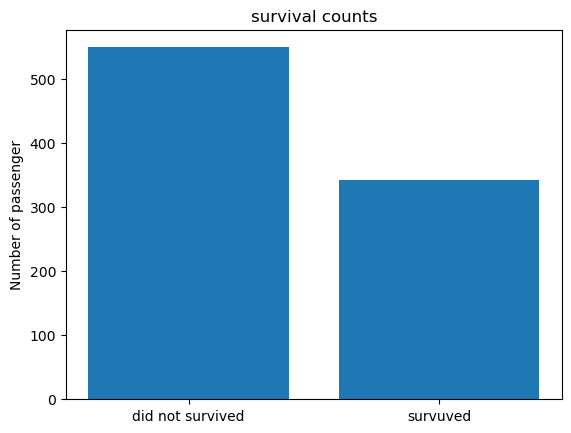

In [10]:
# visualize the raw survival data

plt.bar(df['Survived'].value_counts().index, df['Survived'].value_counts().values)
plt.xticks([0, 1], ['did not survived', 'survuved'])
plt.ylabel('Number of passenger')
plt.title('survival counts')
plt.show()

In [11]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [12]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [13]:
# handling missing values

df['Age'].isnull().sum()

np.int64(177)

In [14]:
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Age'].isnull().sum()

np.int64(0)

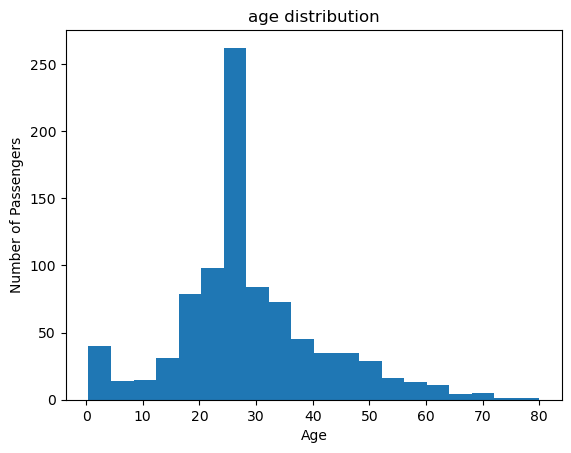

In [15]:
# age distribution

plt.hist(df['Age'], bins = 20)
plt.xlabel('Age')
plt.ylabel('Number of Passengers')
plt.title('age distribution')
plt.show()

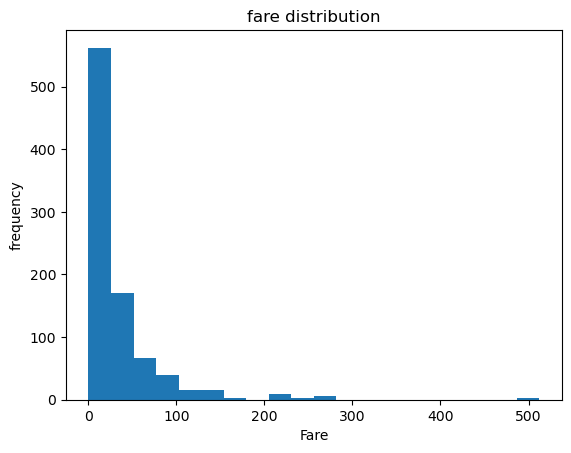

In [16]:
# fare distribution

plt.hist(df['Fare'], bins = 20)
plt.xlabel('Fare')
plt.ylabel('frequency')
plt.title('fare distribution')
plt.show()

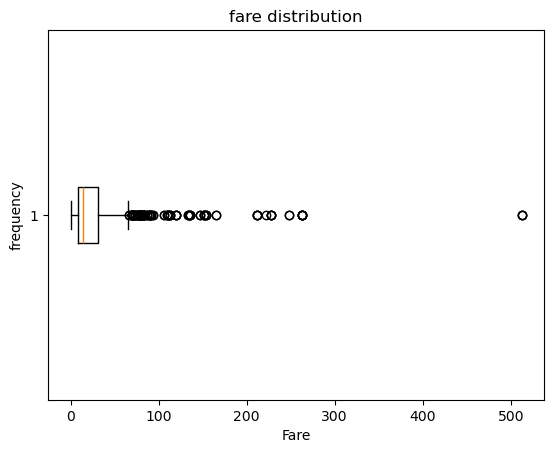

In [17]:
# boxplot to get more context

plt.boxplot(df['Fare'], vert = False)
plt.xlabel('Fare')
plt.ylabel('frequency')
plt.title('fare distribution')
plt.show()

In [18]:
# survival rate by gender
# this give the survival rate not count

gender_survived = df.groupby('Sex')['Survived'].mean()
gender_survived

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

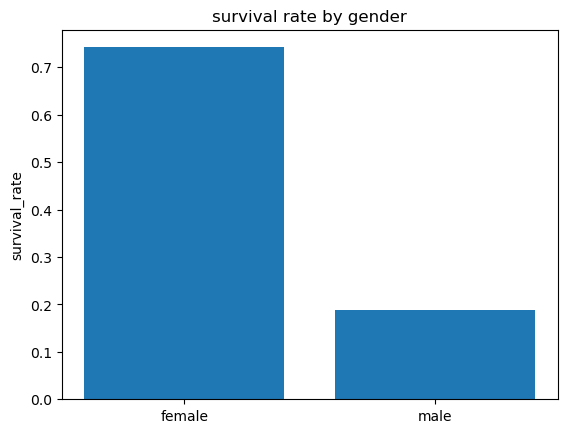

In [19]:
# visualise gender_survived rate

plt.bar(gender_survived.index, gender_survived.values)
plt.ylabel('survival_rate')
plt.title('survival rate by gender')
plt.show()

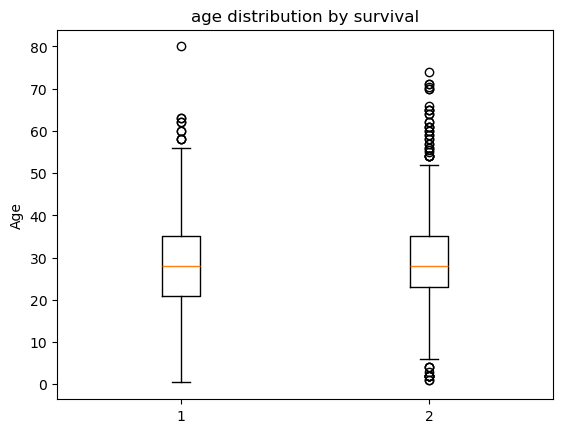

In [20]:
# age survival 

survived = df[df['Survived'] == 1]['Age']
not_survived = df[df['Survived'] == 0]['Age']

plt.boxplot([survived, not_survived], label = ['survived', 'do not survived'])
plt.ylabel('Age')
plt.title('age distribution by survival')
plt.show()

In [21]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [22]:
# handle missing categorical data
# Embark column

df['Embarked'].isnull().sum()

np.int64(2)

In [23]:
# to fill the missing data in the embarked column, we use the mode function which is the most frequent data in that column
# first check wiich port apper often

df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [24]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df['Embarked'].isnull().sum()

np.int64(0)

In [25]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [26]:
# survival rate by class 

class_survival = df.groupby('Pclass')['Survived'].mean()
class_survival

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

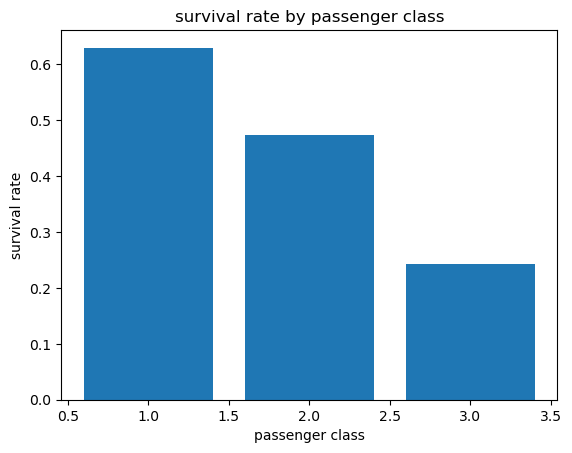

In [27]:
# visualising it

plt.bar(class_survival.index, class_survival.values)
plt.xlabel('passenger class')
plt.ylabel('survival rate')
plt.title('survival rate by passenger class')
plt.show()

In [28]:
# survival by gender and class

gender_survival = df.groupby(['Pclass', 'Sex'])['Survived'].mean().unstack()
gender_survival

Sex,female,male
Pclass,,
1,0.968085,0.368852
2,0.921053,0.157407
3,0.500000,0.135447


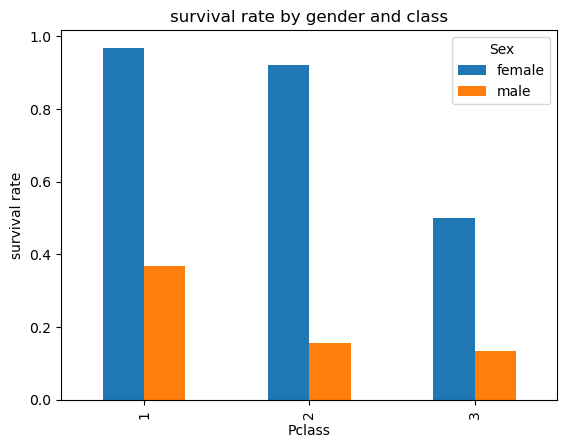

In [29]:
# the plot

gender_survival.plot(kind = 'bar')
plt.ylabel('survival rate')
plt.title('survival rate by gender and class')
plt.show()

In [30]:
# age, survival and class

age_survival = df.groupby(['Age', 'Pclass'])['Survived'].mean()
age_survival

Age    Pclass
0.42   3         1.0
0.67   2         1.0
0.75   3         1.0
0.83   2         1.0
0.92   1         1.0
                ... 
70.00  2         0.0
70.50  3         0.0
71.00  1         0.0
74.00  3         0.0
80.00  1         1.0
Name: Survived, Length: 182, dtype: float64

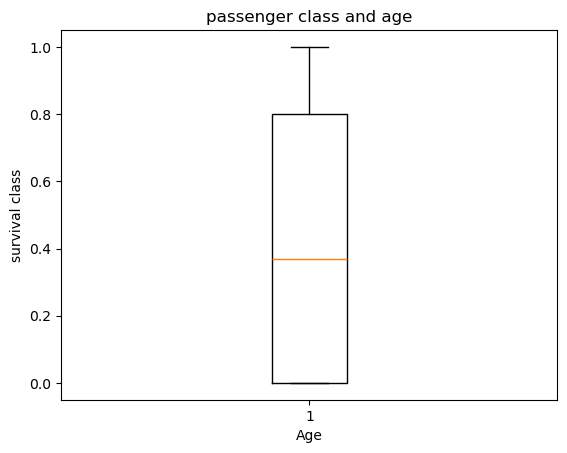

In [31]:
plt.boxplot(age_survival)
plt.xlabel('Age')
plt.ylabel('survival class')
plt.title('passenger class and age')
plt.show()

<Figure size 800x500 with 0 Axes>

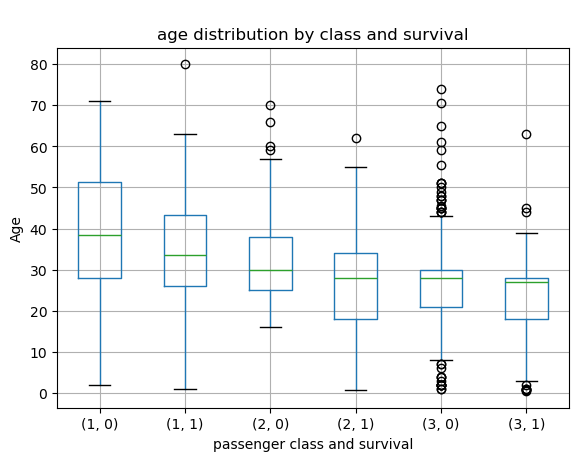

In [32]:
plt.figure(figsize = (8, 5))

df.boxplot(
    column = 'Age',
    by = ['Pclass', 'Survived']
)

plt.title('age distribution by class and survival')
plt.xlabel('passenger class and survival')
plt.ylabel('Age')
plt.suptitle(' ')
plt.show()



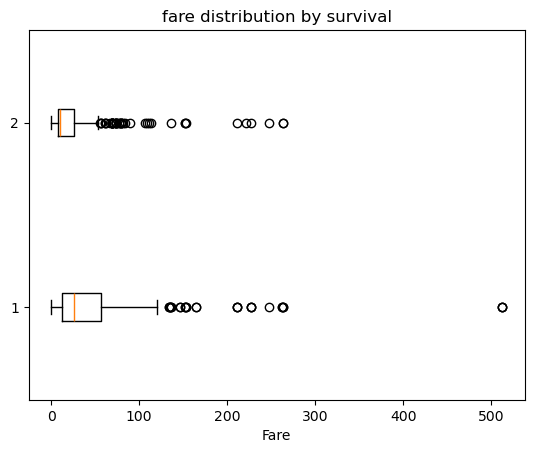

In [33]:
# fare and survival

survived_fare = df[df['Survived'] == 1]['Fare']
not_survived_fare = df[df['Survived'] == 0]['Fare']



plt.boxplot(
    [survived_fare, not_survived_fare],
    label = ['survived', ' did not survived'],
    vert = False
)

plt.title('fare distribution by survival')
plt.xlabel('Fare')
plt.show()

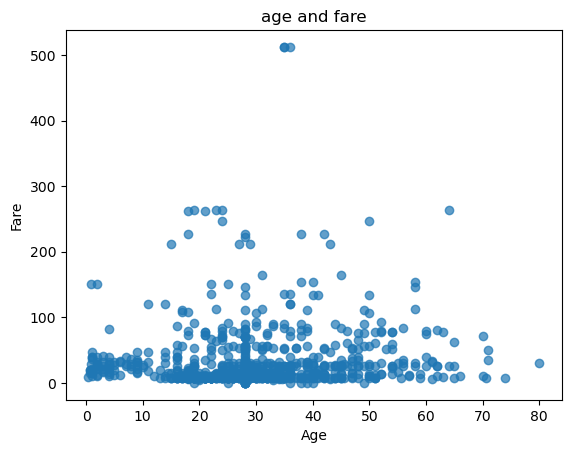

In [34]:
# scatter plot for age and fare

plt.scatter(df['Age'], df['Fare'], alpha = 0.7)
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('age and fare')
plt.show()

In [35]:
# look into fare column

df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [37]:
# apply winsorization to the fare column

fare_wins = df['Fare'].copy()

upper_cap = np.percentile(fare_wins, 95)
fare_wins[fare_wins > upper_cap] = upper_cap

In [40]:
# LOG TRANSFORMATION

fare_log = np.log1p(df['Fare'])
fare_log

0      2.110213
1      4.280593
2      2.188856
3      3.990834
4      2.202765
         ...   
886    2.639057
887    3.433987
888    3.196630
889    3.433987
890    2.169054
Name: Fare, Length: 891, dtype: float64

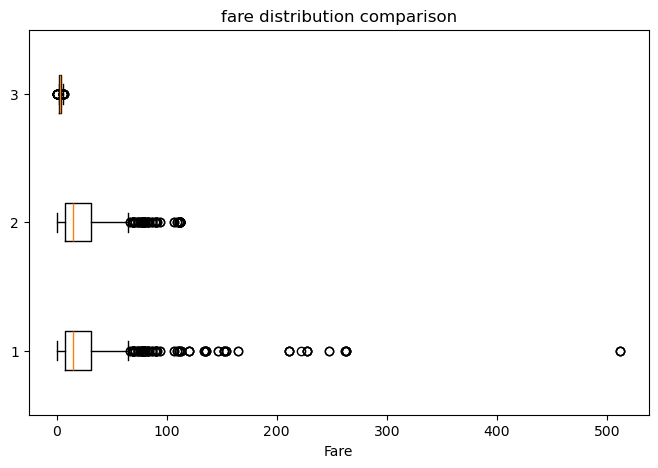

In [42]:
# COMPARE ALL THREE (SIDE-BY-SIDE)

plt.figure(figsize = (8, 5))

plt.boxplot(
    [df['Fare'], fare_wins, fare_log],
    label = ['original', 'winsorized', 'log'],
    vert = False
)

plt.xlabel('Fare')
plt.title('fare distribution comparison')
plt.show()

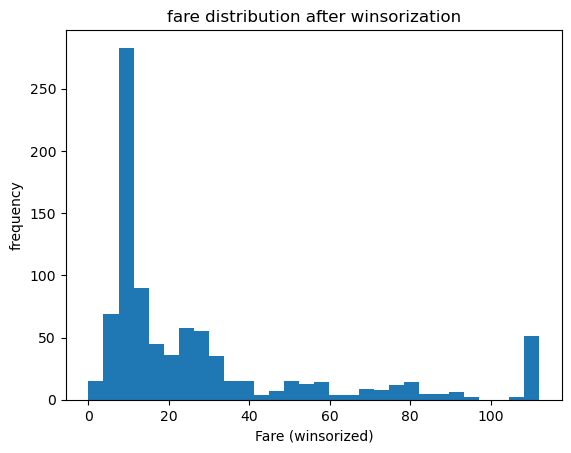

In [43]:
# clean eda visuals

plt.hist(fare_wins, bins = 30)
plt.xlabel('Fare (winsorized)')
plt.ylabel('frequency')
plt.title('fare distribution after winsorization')
plt.show()

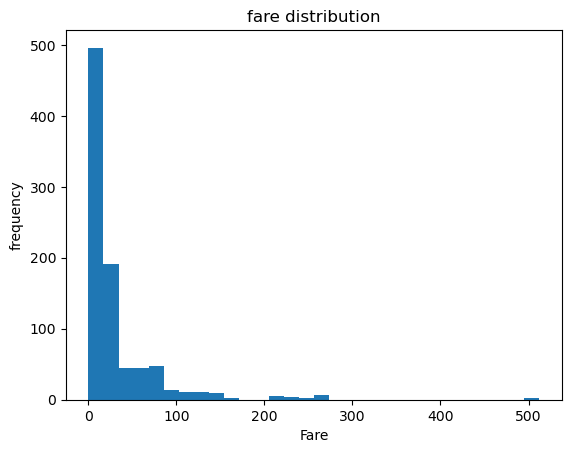

In [46]:
plt.hist(df['Fare'], bins = 30)
plt.xlabel('Fare')
plt.ylabel('frequency')
plt.title('fare distribution')
plt.show()

# ANNOTATING KEY INSIGHTS
## Most passengers paid low fares, 
## while a small number of high-paying passengers created right skew.
## After winsorization, the distribution becomes more balanced without removing data.
